<h1 align="center">Final Report - Lập Trình Python cho Máy Học</h1>
<h1 align="center">Stroke Prediction use Decision Tree Classifier</h1>

- Dataset: [Stroke Prediction](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Download Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1tkHQdSm8Mj65SJRuXbzXxMObJPc2EkHO

Downloading...
From: https://drive.google.com/uc?id=1tkHQdSm8Mj65SJRuXbzXxMObJPc2EkHO
To: /content/dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 44.2MB/s]


In [ ]:
data_url = './dataset-stroke-data.csv'

# Import Libary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import *
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer

# Loading Dataset

In [ ]:
data = pd.read_csv(data_url)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

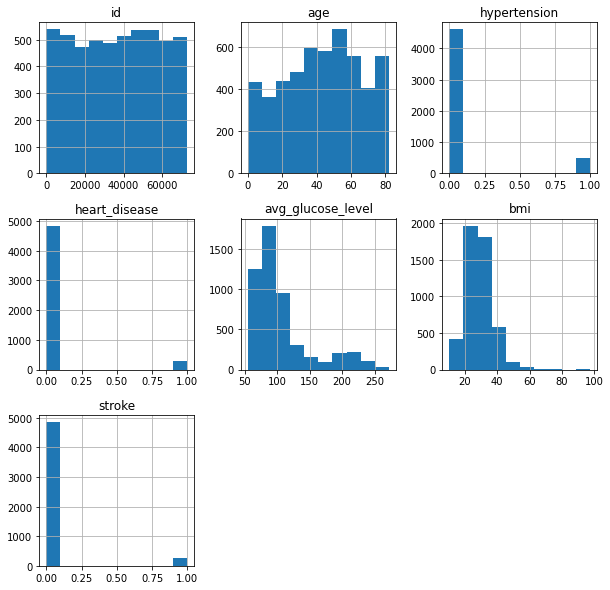

In [ ]:
data.hist(figsize=(10,10));

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Prepare Data

In [ ]:
df = pd.DataFrame(data)
df = df.dropna()

df = df.drop(['id'], axis=1) # Bỏ cột id
df = df.drop([3116]) # Xoá hàng có gender là Other (vì nó có 1 hàng nên không ảnh hưởng đến việc huấn luận)

X_data = df.iloc[:, 0:-1];
y_data = df.iloc[:, -1:];

In [ ]:
# Lấy các cột cần chuẩn hoá về dạng số
X_gender = df['gender'].to_numpy().reshape(-1, 1)
X_ever_married = df['ever_married'].to_numpy().reshape(-1, 1)
X_work_type = df['work_type'].to_numpy().reshape(-1, 1)
X_Residence_type = df['Residence_type'].to_numpy().reshape(-1, 1)
X_smoking_status = df['smoking_status'].to_numpy().reshape(-1, 1)

X_data = X_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

## Label Binarizer

In [ ]:
lb = preprocessing.LabelBinarizer()

X_gender = lb.fit_transform(X_gender)
X_ever_married = lb.fit_transform(X_ever_married)
X_Residence_type = lb.fit_transform(X_Residence_type)

## One Hot Encoding

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

X_work_type = enc.fit_transform(X_work_type).toarray()
X_smoking_status = enc.fit_transform(X_smoking_status).toarray()

## Concat The Column

In [ ]:
X_data = np.hstack([X_data, X_gender])
X_data = np.hstack([X_data, X_ever_married])
X_data = np.hstack([X_data, X_work_type])
X_data = np.hstack([X_data, X_Residence_type])
X_data = np.hstack([X_data, X_smoking_status])

In [ ]:
y_data = y_data.to_numpy()

In [ ]:
y_data

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

# Chia tập train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Tranning and Evaluate Model

## Normal

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1521
           1       0.17      0.14      0.16        99

    accuracy                           0.91      1620
   macro avg       0.56      0.55      0.55      1620
weighted avg       0.90      0.91      0.90      1620



In [ ]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    imputer = KNNImputer(n_neighbors=2)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
    
    print(f)

## K-Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_list = []

for train, test in kfold.split(X_data, y_data):
    clf = DecisionTreeClassifier()

    X_train, X_test = X_data[train], X_data[test];
    y_train, y_test = y_data[train], y_data[test];

    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

print("Accuracy: ", np.mean(accuracy_list) * 100)

Accuracy:  92.03348343578917


# Hyperparameter Tuning for Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

parameters = {
    'clf__max_depth': [2, 3, 4],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [2, 4], 
    'clf__max_leaf_nodes': [8, 16, 32],    
}


pipeline = Pipeline(
    steps=[("clf", DecisionTreeClassifier())]
)

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             n_jobs=12,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 3, 4],
                         'clf__max_leaf_nodes': [8, 16, 32],
                         'clf__min_samples_split': [2, 4]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
y_pred = gscv.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1620
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1620
   macro avg       0.50      0.48      0.49      1620
weighted avg       1.00      0.95      0.97      1620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gscv.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 2,
 'clf__max_leaf_nodes': 8,
 'clf__min_samples_split': 2}